'
##Data Understanding##
📌 ##Objective##:
The goal of this step is to deeply understand the structure and quality of the provided dataset, which will inform the subsequent steps in feature engineering and model building.

📁 Dataset Description:
The dataset contains weekly sales data of beverage products sold by a company across Australia. Key attributes include:


Column Name	Description
Product	Unique product identifier (e.g., SKU1, SKU2, etc.)
Date	Weekly date of sales record
Sales	Weekly sales volume (target variable)
Price Discount (%)	Discount percentage offered on the product in that week
In-Store Promo	Binary flag indicating in-store promotion
Catalogue Promo	Binary flag indicating catalogue-based promotion
Store End Promo	Binary flag for end-of-aisle/store-end promotions
Google_Mobility	A score representing customer movement trends from Google Mobility reports
Covid_Flag	Flag indicating whether COVID-19 measures were in effect
V_DAY / EASTER / CHRISTMAS	Binary indicators for key holidays impacting demand

In [5]:
import os
print(os.getcwd())


C:\Users\Egbe\Downloads


In [21]:
import pandas as pd

# Update the path to your actual file location
file_path = r"C:\Users\Egbe\Downloads\forecasting_case_study.xlsx"

# Load the Excel file
df = pd.read_excel(file_path)

# Display the first 5 rows
df.head()


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [23]:
# Number of rows and columns
df.shape

# Column names
df.columns


Index(['Product', 'date', 'Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS'],
      dtype='object')

In [25]:
# Check data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 114.3+ KB


In [13]:
# Missing values count
df.isnull().sum()


Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

In [15]:
# Number of unique products
df['Product'].nunique()

# Date range
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime format if not already
df['date'].min(), df['date'].max()


(Timestamp('2017-02-05 00:00:00'), Timestamp('2020-12-27 00:00:00'))

In [27]:
# Basic statistics
df.describe(include='all')


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218,1218,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SKU1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2019-01-13 02:04:08.275862016,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
min,NaN,2017-02-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2018-01-21 00:00:00,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2019-01-13 00:00:00,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2020-01-05 00:00:00,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,2020-12-27 00:00:00,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


In [31]:
import pandas as pd

# Replace the file path below if needed
data = pd.read_excel("forecasting_case_study.xlsx")

# Quick check
data.head()


,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


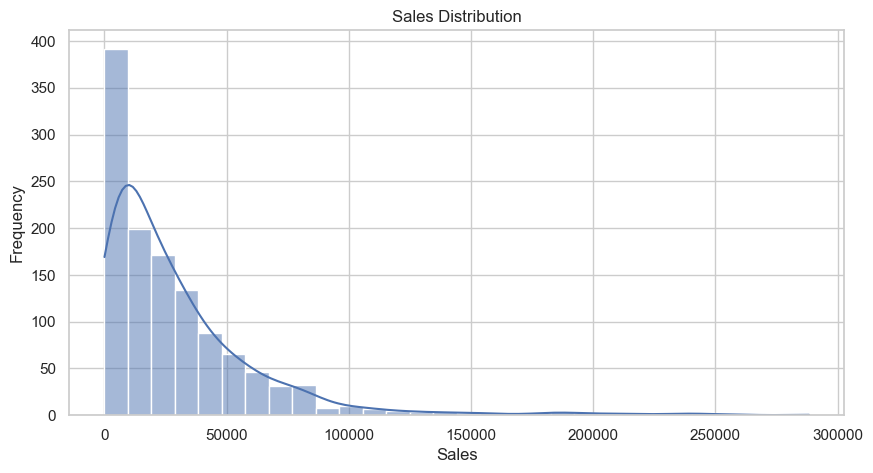

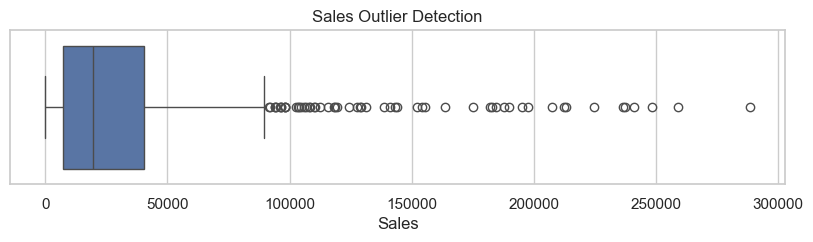

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram for Sales
plt.figure(figsize=(10,5))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Sales (to detect outliers)
plt.figure(figsize=(10,2))
sns.boxplot(x=data['Sales'])
plt.title("Sales Outlier Detection")
plt.show()


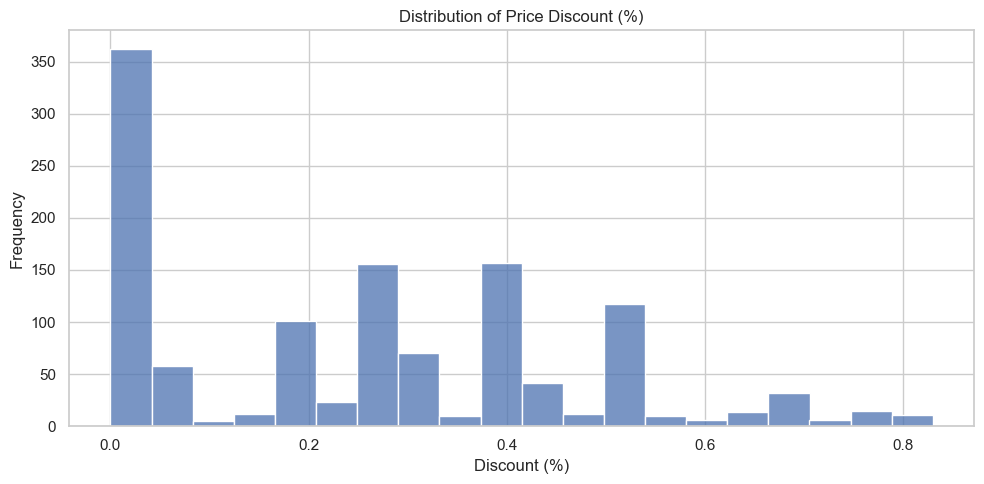

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of Price Discount
plt.figure(figsize=(10, 5))
sns.histplot(df['Price Discount (%)'], bins=20, kde=False)
plt.title('Distribution of Price Discount (%)')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4180362094.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette='pastel')
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4180362094.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Inactive (0)', 'Active (1)'])
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4180362094.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, ax=axes[i], palette='pastel')
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4180362094.py:16: UserWarning: set_ticklabels() should only be used wi

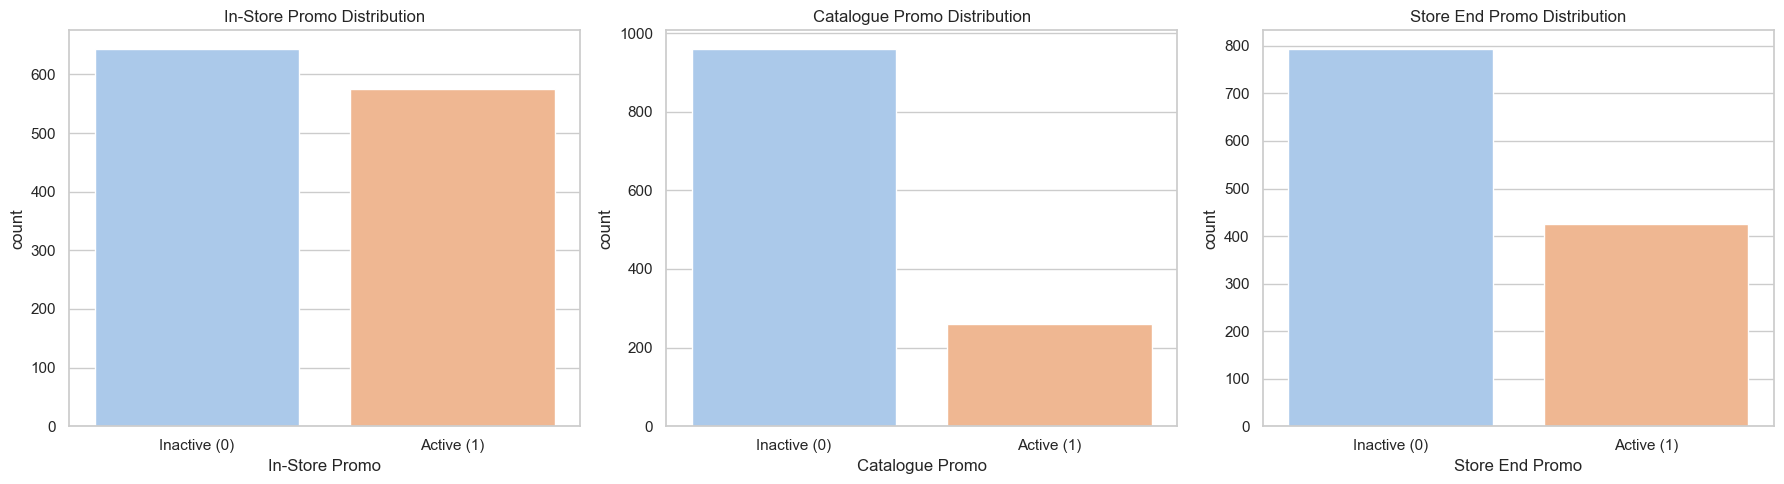

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# List of promotion features
promo_features = ['In-Store Promo', 'Catalogue Promo', 'Store End Promo']

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(promo_features):
    sns.countplot(data=df, x=feature, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xticklabels(['Inactive (0)', 'Active (1)'])

plt.tight_layout()
plt.show()


C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\902349072.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Event (0)', 'Event Occurred (1)'])
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\902349072.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Event (0)', 'Event Occurred (1)'])
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\902349072.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Event (0)', 'Event Occurred (1)'])


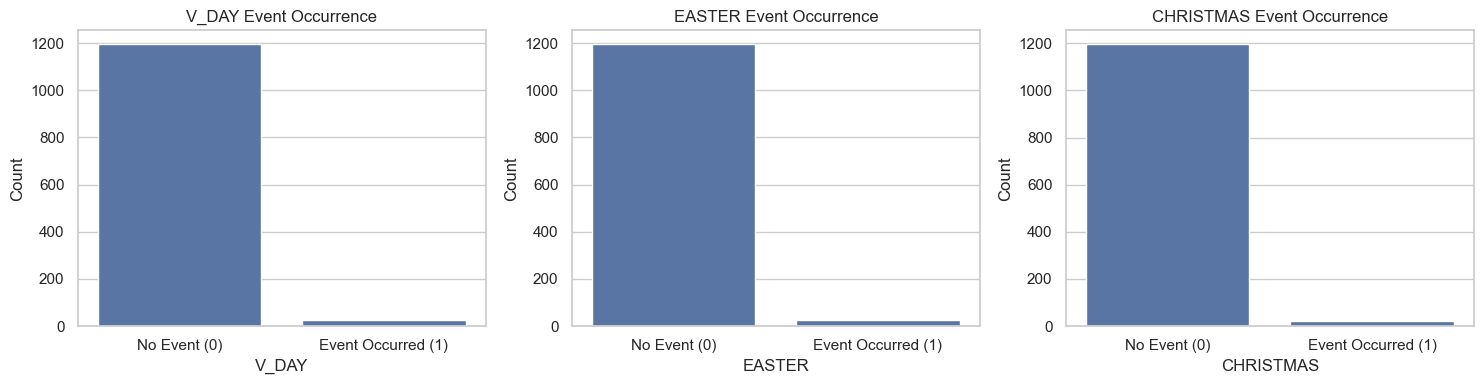

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

event_cols = ['V_DAY', 'EASTER', 'CHRISTMAS']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, event in enumerate(event_cols):
    sns.countplot(x=event, data=df, ax=axes[i])
    axes[i].set_title(f'{event} Event Occurrence')
    axes[i].set_xticklabels(['No Event (0)', 'Event Occurred (1)'])
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


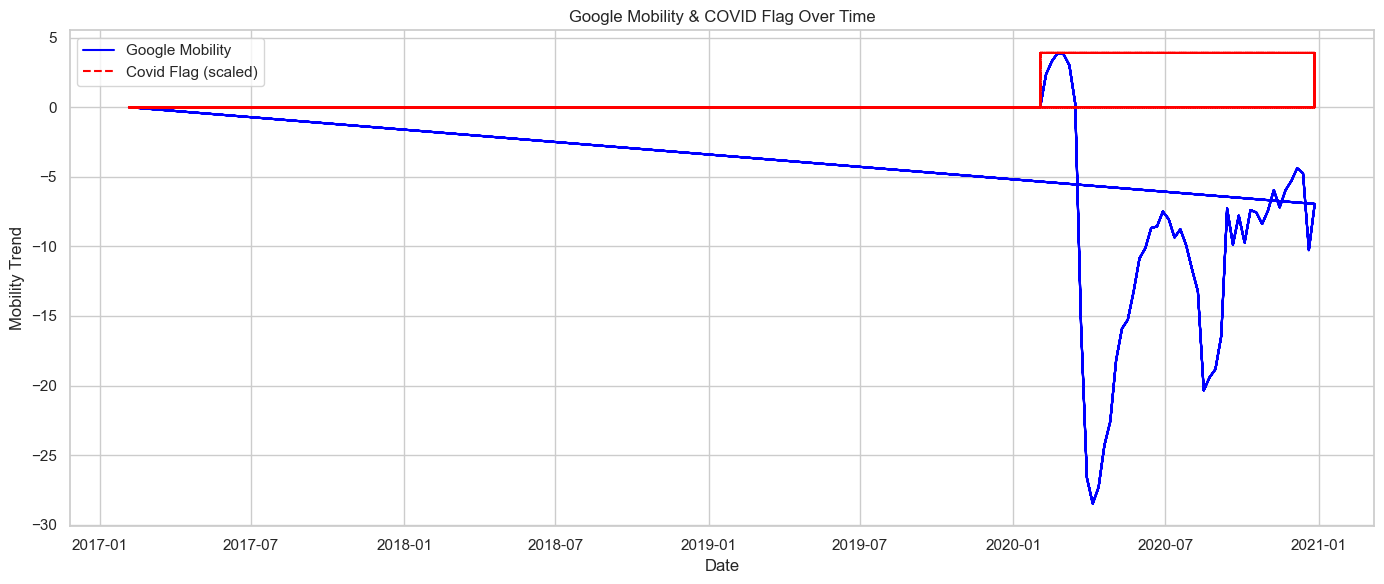

In [41]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot Google Mobility
plt.plot(df['date'], df['Google_Mobility'], label='Google Mobility', color='blue')

# Plot Covid Flag as a step plot
plt.step(df['date'], df['Covid_Flag'] * max(df['Google_Mobility']), 
         label='Covid Flag (scaled)', color='red', linestyle='--')

# Titles and labels
plt.title('Google Mobility & COVID Flag Over Time')
plt.xlabel('Date')
plt.ylabel('Mobility Trend')
plt.legend()
plt.tight_layout()
plt.grid(True)

# Show plot
plt.show()


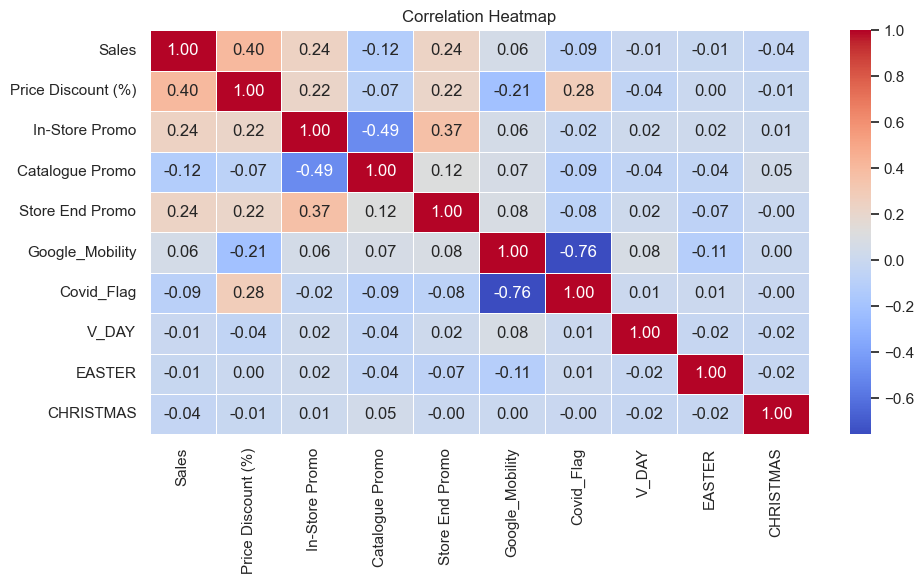

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


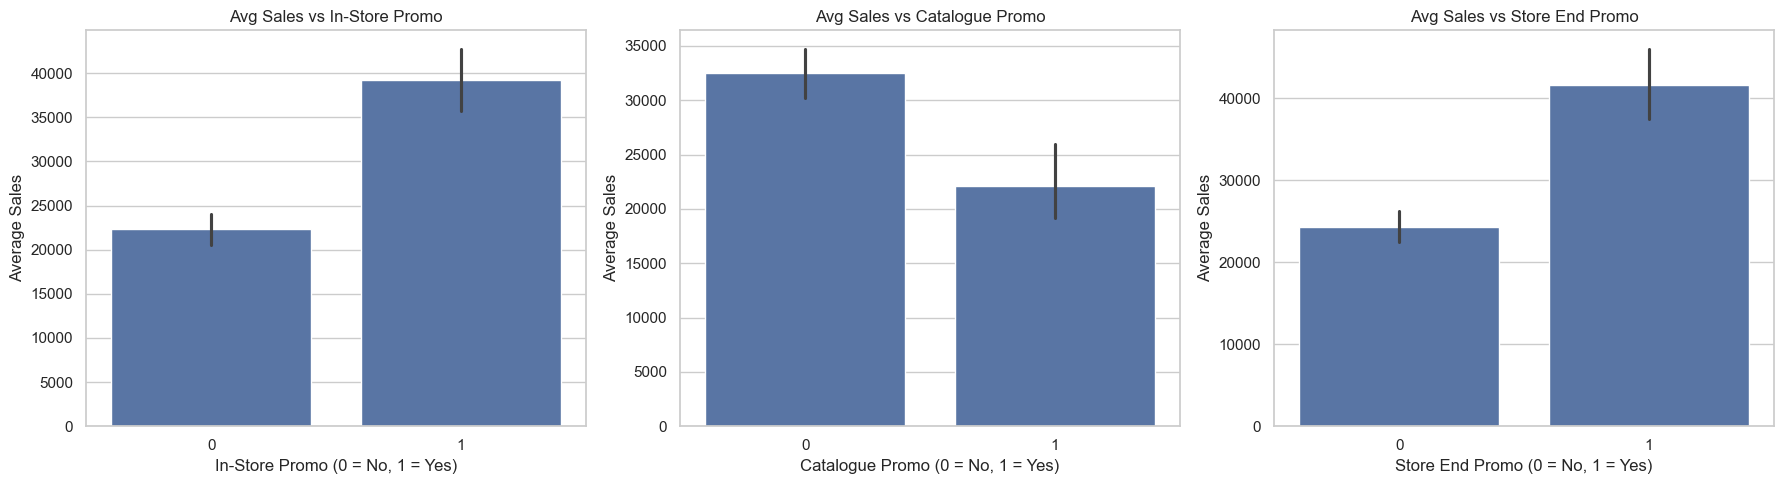

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Promotion columns
promo_features = ['In-Store Promo', 'Catalogue Promo', 'Store End Promo']

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(promo_features):
    sns.barplot(data=df, x=feature, y='Sales', ax=axes[i])
    axes[i].set_title(f'Avg Sales vs {feature}')
    axes[i].set_xlabel(f'{feature} (0 = No, 1 = Yes)')
    axes[i].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()


C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4189079001.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4189079001.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Event (0)', 'Event (1)'])
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4189079001.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4189079001.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Event (0)', 'Event (1)'])
C:\Users\Egbe\AppData\Local\Temp\ipykernel_7812\4189079001.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same eff

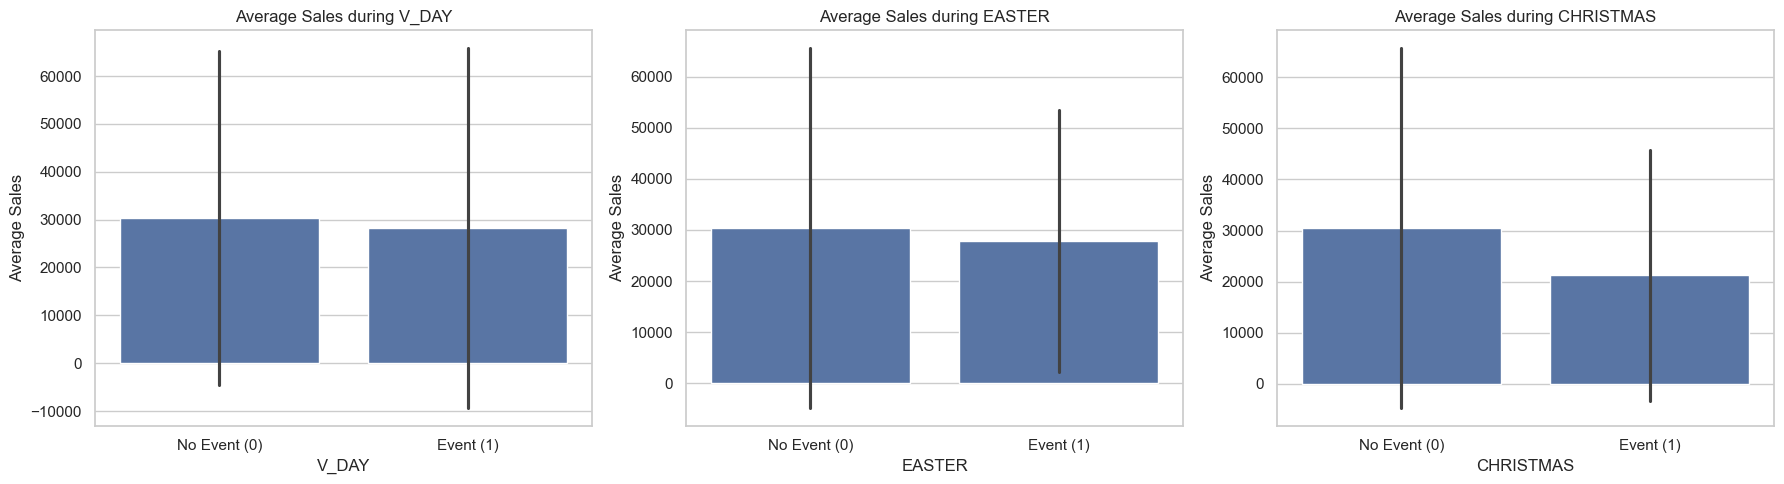

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

events = ['V_DAY', 'EASTER', 'CHRISTMAS']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, event in enumerate(events):
    sns.barplot(
        data=df,
        x=event,
        y='Sales',
        ax=axes[i],
        ci='sd'
    )
    axes[i].set_title(f'Average Sales during {event}')
    axes[i].set_xticklabels(['No Event (0)', 'Event (1)'])
    axes[i].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()


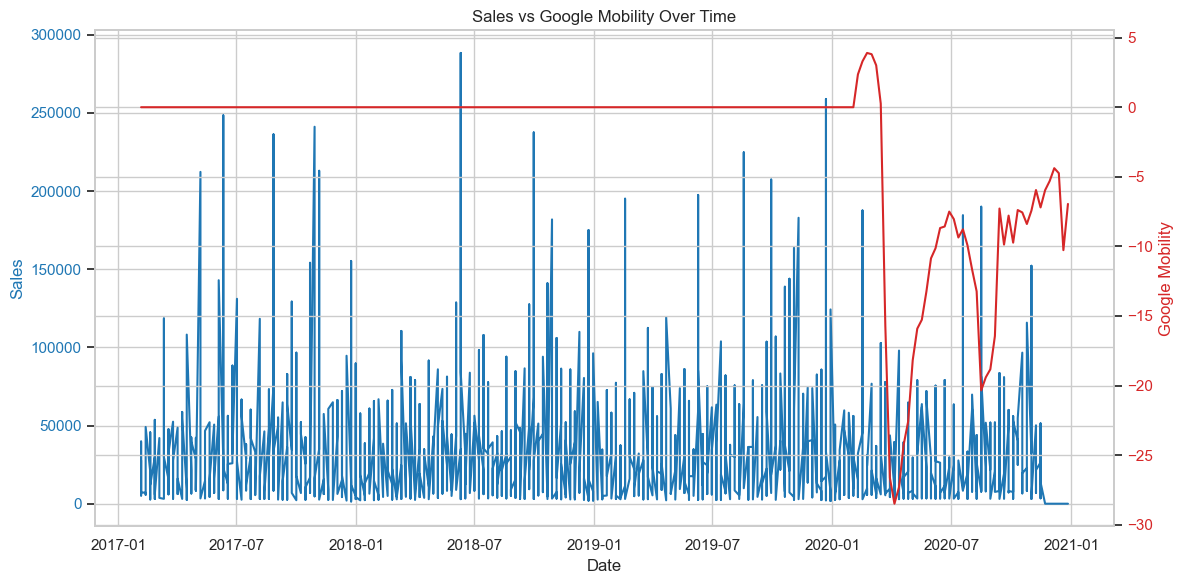

In [51]:
import matplotlib.pyplot as plt

# Ensure 'date' column is datetime type
df['date'] = pd.to_datetime(df['date'])

# Sort by date just in case
df = df.sort_values(by='date')

# Plot Sales and Google Mobility on dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color=color)
ax1.plot(df['date'], df['Sales'], color=color, label='Sales')
ax1.tick_params(axis='y', labelcolor=color)

# Create second axis for Google Mobility
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Google Mobility', color=color)
ax2.plot(df['date'], df['Google_Mobility'], color=color, label='Google Mobility')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sales vs Google Mobility Over Time')
fig.tight_layout()
plt.show()


In [53]:
# Create pivot table: average sales by Product and CHRISTMAS flag (0 or 1)
pivot_christmas = pd.pivot_table(
    df,
    values='Sales',
    index='Product',
    columns='CHRISTMAS',
    aggfunc='mean'
).round(2)

# Rename columns for clarity
pivot_christmas.columns = ['No Christmas', 'During Christmas']
pivot_christmas = pivot_christmas.sort_values(by='During Christmas', ascending=False)

pivot_christmas.head()


,No Christmas,During Christmas
Product,,
SKU1,47475.71,49831.50
SKU6,37836.38,40941.33
SKU3,56471.84,23928.25
SKU4,17172.61,7172.25
SKU5,16675.58,6243.50


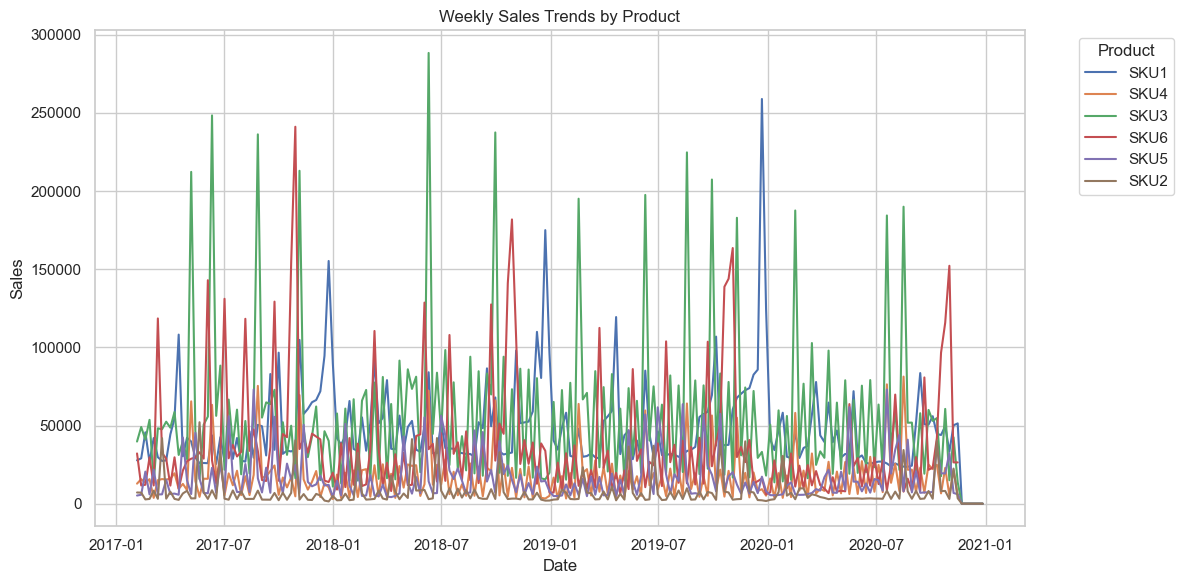

In [55]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create line plot of sales trends for each SKU over time
plt.figure(figsize=(12, 6))
for product in df['Product'].unique():
    product_df = df[df['Product'] == product]
    plt.plot(product_df['date'], product_df['Sales'], label=product)

plt.title('Weekly Sales Trends by Product')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


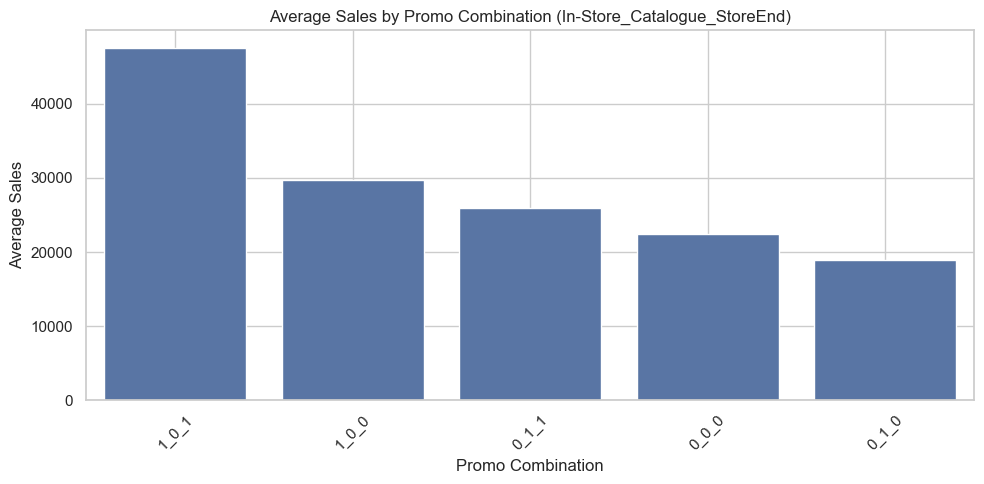

In [57]:
# Create a new column to represent promo combination (e.g., 1_0_1 for In-Store + Store End)
df['Promo_Combo'] = (
    df['In-Store Promo'].astype(str) + "_" +
    df['Catalogue Promo'].astype(str) + "_" +
    df['Store End Promo'].astype(str)
)

# Calculate average sales for each promo combination
promo_effect = df.groupby('Promo_Combo')['Sales'].mean().sort_values(ascending=False).round(2)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=promo_effect.index, y=promo_effect.values)
plt.title("Average Sales by Promo Combination (In-Store_Catalogue_StoreEnd)")
plt.xlabel("Promo Combination")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [61]:
# Sort data by product and date
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by=['Product', 'date']).reset_index(drop=True)

# Create lag features
df_sorted['Sales_lag_1'] = df_sorted.groupby('Product')['Sales'].shift(1)
df_sorted['Sales_lag_2'] = df_sorted.groupby('Product')['Sales'].shift(2)
df_sorted['Sales_lag_3'] = df_sorted.groupby('Product')['Sales'].shift(3)

# Preview
df_sorted[['Product', 'date', 'Sales', 'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3']].head(10)


,Product,date,Sales,Sales_lag_1,Sales_lag_2,Sales_lag_3
0,SKU1,2017-02-05,27750,NaN,NaN,NaN
1,SKU1,2017-02-12,29023,27750.0,NaN,NaN
2,SKU1,2017-02-19,45630,29023.0,27750.0,NaN
3,SKU1,2017-02-26,26789,45630.0,29023.0,27750.0
4,SKU1,2017-03-05,41999,26789.0,45630.0,29023.0
5,SKU1,2017-03-12,29731,41999.0,26789.0,45630.0
6,SKU1,2017-03-19,27365,29731.0,41999.0,26789.0
7,SKU1,2017-03-26,27722,27365.0,29731.0,41999.0
8,SKU1,2017-04-02,44339,27722.0,27365.0,29731.0
9,SKU1,2017-04-09,54655,44339.0,27722.0,27365.0


In [63]:
# Ensure date is datetime and sort properly
df['date'] = pd.to_datetime(df['date'])
df_sorted = df.sort_values(by=['Product', 'date']).reset_index(drop=True)

# Create 3-week and 5-week rolling average sales
df_sorted['Sales_roll_mean_3'] = df_sorted.groupby('Product')['Sales'].transform(lambda x: x.rolling(window=3).mean())
df_sorted['Sales_roll_mean_5'] = df_sorted.groupby('Product')['Sales'].transform(lambda x: x.rolling(window=5).mean())

# View the results
df_sorted[['Product', 'date', 'Sales', 'Sales_roll_mean_3', 'Sales_roll_mean_5']].head(10)


,Product,date,Sales,Sales_roll_mean_3,Sales_roll_mean_5
0,SKU1,2017-02-05,27750,NaN,NaN
1,SKU1,2017-02-12,29023,NaN,NaN
2,SKU1,2017-02-19,45630,34134.333333,NaN
3,SKU1,2017-02-26,26789,33814.000000,NaN
4,SKU1,2017-03-05,41999,38139.333333,34238.2
5,SKU1,2017-03-12,29731,32839.666667,34634.4
6,SKU1,2017-03-19,27365,33031.666667,34302.8
7,SKU1,2017-03-26,27722,28272.666667,30721.2
8,SKU1,2017-04-02,44339,33142.000000,34231.2
9,SKU1,2017-04-09,54655,42238.666667,36762.4


In [65]:
# Extract date components
df_sorted['Week'] = df_sorted['date'].dt.isocalendar().week
df_sorted['Month'] = df_sorted['date'].dt.month
df_sorted['Year'] = df_sorted['date'].dt.year
df_sorted['Day_of_Week'] = df_sorted['date'].dt.dayofweek

# Preview the new features
df_sorted[['date', 'Week', 'Month', 'Year', 'Day_of_Week']].head(10)


,date,Week,Month,Year,Day_of_Week
0,2017-02-05,5,2,2017,6
1,2017-02-12,6,2,2017,6
2,2017-02-19,7,2,2017,6
3,2017-02-26,8,2,2017,6
4,2017-03-05,9,3,2017,6
5,2017-03-12,10,3,2017,6
6,2017-03-19,11,3,2017,6
7,2017-03-26,12,3,2017,6
8,2017-04-02,13,4,2017,6
9,2017-04-09,14,4,2017,6


In [67]:
# Total number of active promos (0 to 3)
df_sorted['Total_Promos'] = df_sorted[['In-Store Promo', 'Catalogue Promo', 'Store End Promo']].sum(axis=1)

# Binary: was any promo active?
df_sorted['Any_Promo'] = (df_sorted['Total_Promos'] > 0).astype(int)

# Count of active holiday/event flags
df_sorted['Event_Count'] = df_sorted[['V_DAY', 'EASTER', 'CHRISTMAS']].sum(axis=1)

# Preview result
df_sorted[['date', 'In-Store Promo', 'Catalogue Promo', 'Store End Promo', 'Total_Promos', 'Any_Promo', 'V_DAY', 'EASTER', 'CHRISTMAS', 'Event_Count']].head(10)


,date,In-Store Promo,Catalogue Promo,Store End Promo,Total_Promos,Any_Promo,V_DAY,EASTER,CHRISTMAS,Event_Count
0,2017-02-05,0,0,0,0,0,0,0,0,0
1,2017-02-12,1,0,1,2,1,1,0,0,1
2,2017-02-19,0,0,0,0,0,0,0,0,0
3,2017-02-26,1,0,1,2,1,0,0,0,0
4,2017-03-05,0,0,0,0,0,0,0,0,0
5,2017-03-12,0,0,0,0,0,0,0,0,0
6,2017-03-19,1,0,0,1,1,0,0,0,0
7,2017-03-26,1,0,1,2,1,0,0,0,0
8,2017-04-02,1,0,0,1,1,0,0,0,0
9,2017-04-09,1,0,0,1,1,0,1,0,1


In [69]:
# Drop rows with NaN (caused by lag/rolling features)
df_model = df_sorted.dropna().reset_index(drop=True)


In [71]:
# Optional: drop 'date' if not using time-based model
# Optional: drop 'Product' if modeling each SKU separately
df_model = df_model.drop(columns=['date'])  # or 'Product'


In [73]:
# Sort by time again just to be safe
df_model = df_model.sort_values(by=['Year', 'Week']).reset_index(drop=True)

# 80% training, 20% test
split_index = int(len(df_model) * 0.8)
train_df = df_model.iloc[:split_index]
test_df = df_model.iloc[split_index:]

# Confirm shape
train_df.shape, test_df.shape


((955, 21), (239, 21))

In [75]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 4.9 MB/s eta 0:00:31
    --------------------------------------- 2.6/150.0 MB 5.2 MB/s eta 0:00:29
    --------------------------------------- 3.7/150.0 MB 5.1 MB/s eta 0:00:29
   - -------------------------------------- 4.7/150.0 MB 5.3 MB/s eta 0:00:28
   - -------------------------------------- 5.8/150.0 MB 5.3 MB/s eta 0:00:28
   - -------------------------------------- 7.1/150.0 MB 5.3 MB/s eta 0:00:27
   -- ------------------------------------- 7.9/150.0 MB 5.2 MB/s eta 0:00:28
   -- ------------------------------------- 9.2/150.0 MB 5.3 MB/s eta 0:00:27
   -- ------------------------------------- 10.2/150.0 MB 5.3 MB/s eta 0:00:27
   -- ------------------------------------- 10.5/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 11.0/150.0 MB 4.7 MB/s eta 0:00:

In [76]:
!pip install xgboost


In [87]:
# Drop non-numeric columns
X_train = train_df.drop(columns=['Sales', 'Product', 'Promo_Combo'])
y_train = train_df['Sales']

X_test = test_df.drop(columns=['Sales', 'Product', 'Promo_Combo'])
y_test = test_df['Sales']


In [89]:
# Import xgboost
import xgboost as xgb

# Initialize XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [93]:
# Check how many zero sales are in the test set
zero_sales_count = (y_test == 0).sum()
print(f"Number of zero sales in y_test: {zero_sales_count}")


Number of zero sales in y_test: 30


In [95]:
# Create a mask for non-zero actual sales
non_zero_mask = y_test != 0

# Apply the mask to predictions and true values
y_test_non_zero = y_test[non_zero_mask]
y_pred_non_zero = y_pred[non_zero_mask]

# Recalculate evaluation metrics
mae_corrected = mean_absolute_error(y_test_non_zero, y_pred_non_zero)
mape_corrected = mean_absolute_percentage_error(y_test_non_zero, y_pred_non_zero)

# Show corrected results
print(f"Corrected Mean Absolute Error (MAE): {mae_corrected:.2f}")
print(f"Corrected Mean Absolute Percentage Error (MAPE): {mape_corrected:.2%}")


Corrected Mean Absolute Error (MAE): 13535.41
Corrected Mean Absolute Percentage Error (MAPE): 85.86%


In [97]:
# Initialize XGBoost with better tuning
model_xgb_tuned = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the tuned model
model_xgb_tuned.fit(X_train, y_train)

# Make new predictions
y_pred_tuned = model_xgb_tuned.predict(X_test)

# Apply non-zero sales mask again
y_test_non_zero = y_test[non_zero_mask]
y_pred_tuned_non_zero = y_pred_tuned[non_zero_mask]

# Recalculate evaluation metrics
mae_tuned = mean_absolute_error(y_test_non_zero, y_pred_tuned_non_zero)
mape_tuned = mean_absolute_percentage_error(y_test_non_zero, y_pred_tuned_non_zero)

# Show tuned model results
print(f"Tuned MAE: {mae_tuned:.2f}")
print(f"Tuned MAPE: {mape_tuned:.2%}")


Tuned MAE: 12792.70
Tuned MAPE: 79.80%


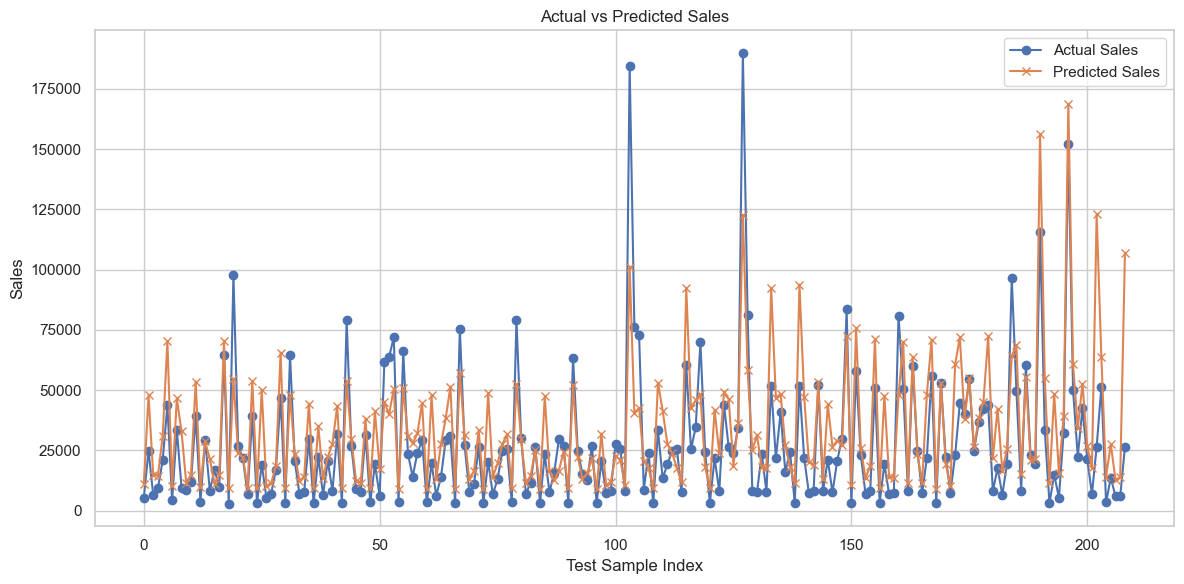

In [99]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(12,6))
plt.plot(y_test_non_zero.values, label='Actual Sales', marker='o')
plt.plot(y_pred_tuned_non_zero, label='Predicted Sales', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
